<figure>
  <IMG src="figures/logo-esi-sba.png" WIDTH=300 height="100" ALIGN="right">
</figure>

# Practical Lab Series on Network Sciences   
*By Dr. Belkacem KHALDI (b.khaldi@esi-sba.dz)*

## Notebook 1: Introduction to Graph theory for GNNs with NetworkX
This Jupyter Notebook is designed to help you learn basics of Graph Theory for GNNs using `NetworkX`. The notebook covers the different aspect of graph theory seen in the lecture.

`NetworkX` is a Python package used for the creation, manipulation, study, and analysys of complex networks.


In [93]:
%matplotlib inline
import matplotlib.pyplot as plt
import networkx as nx

## Introduction to Graph Theory
`Graph theory` is a branch of mathematics that deals with the study of graphs and their properties. A graph is a collection of vertices (also known as nodes) and edges that connect these vertices. In this section, we will discuss the basics of graph theory, including the different types of graphs and their properties:

## Essential Graph Properties:
### Undirected vs Directed Graph:
 An undirected graph is a graph in which edges do not have a particular direction, while a directed graph has edges that point in a specific direction. Directed graphs are more expressive than undirected graphs because they allow the modeling of relationships that have a hierarchical nature. However, undirected graphs are more common in practice, and many real-world relationships are best modeled by undirected graphs.

 Here is an example on how to create an undirected graph:

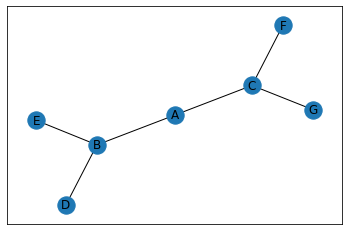

In [94]:
# Creating an instance of an undirected graph
UG = nx.Graph()
# Adding edges to the graph 
UG.add_edges_from([('A', 'B'), ('A', 'C'), 
                   ('B', 'D'), ('B', 'E'),
                   ('C', 'F'), ('C', 'G')])
# Drowing the graph
nx.draw_networkx(UG)
plt.show()

 Here is an example on how to create a directed graph:

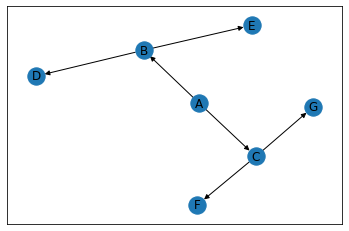

In [95]:
# Creating an instance of a directed graph
DG = nx.DiGraph()
# Adding edges to the graph 
DG.add_edges_from([('A', 'B'), ('A', 'C'), 
                   ('B', 'D'), ('B', 'E'),
                   ('C', 'F'), ('C', 'G')])
# Drowing the graph
nx.draw_networkx(DG)
plt.show()

### Weighted Graph:
A weighted graph is a graph in which the edges are assigned some weights which represent cost, distance, and many other relative measuring units. Weighted graphs are used to model many real-world scenarios such as transportation networks, social networks, and biological networks.
 Here is an example on how to create a weighted graph:

{('A', 'B'): 10, ('A', 'C'): 20, ('B', 'D'): 30, ('B', 'E'): 40, ('C', 'F'): 50, ('C', 'G'): 60}


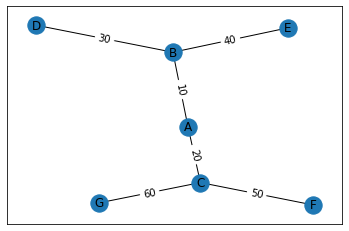

In [96]:
# Creating an instance of an undirected graph
WG = nx.Graph()

# Adding edges to the graph along with their weights
WG.add_edges_from([('A', 'B', {"weight": 10}), 	
                   ('A', 'C', {"weight": 20}),    
                   ('B', 'D', {"weight": 30}),
                   ('B', 'E', {"weight": 40}), 	
                   ('C', 'F', {"weight": 50}), 	
                   ('C', 'G', {"weight": 60})])

# Retrieving the weights associated with each edge
labels = nx.get_edge_attributes(WG, "weight")
print(labels)

# Drawing the graph
pos = nx.spring_layout(WG)
nx.draw_networkx(WG, pos)
nx.draw_networkx_edge_labels(WG, pos, edge_labels=labels)
plt.show()


In the above example, We assign weights to the edges using the weight parameter. We then use the `spring_layout` function to position the nodes using the Fruchterman-Reingold force-directed algorithm and draw the graph using `nx.draw`. Finally, we use `nx.get_edge_attributes` to get the edge weights and draw them using `nx.draw_networkx_edge_labels`.

You may try with different built-in NetworkX based position algorithms such as:
- `circular_layout`: Positions nodes on a circle.
- `kamada_kawai_layout`: Positions nodes using an iterative algorithm based on the minimum energy of the system.
- `random_layout`: Positions nodes randomly.
- `shell_layout`: Positions nodes in concentric circles. 

### Connected vs unconnected Graph:
A graph is said to be connected if every pair of vertices in the graph is connected by a path. This means that there is a path between every pair of vertices. An undirected graph that is not connected is called disconnected. In contrast, a directed graph is strongly connected if there is a directed path from any vertex to any other vertex, while it is weakly connected if replacing all directed edges with undirected edges produces a connected (undirected) graph.

Here is an example of conneced vs unconnected graph:

Is graph G1 connected? False


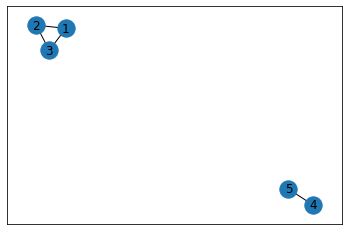

In [97]:
# Creating an instance of an undirected graph
G1 = nx.Graph()
# Adding edges to the graph for G1
G1.add_edges_from([(1, 2), (2, 3), (3, 1), (4, 5)])
# Check Connectivity of G1 and Print Results
print(f"Is graph G1 connected? {nx.is_connected(G1)}")
# Drawing the graph
nx.draw_networkx(G1)
plt.show()

Is graph G2 connected? True


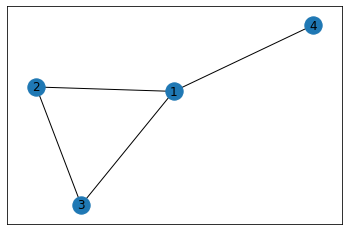

In [98]:
# Creating another instance of an undirected graph 
G2 = nx.Graph()
# Adding edges to the graph for G2
G2.add_edges_from([(1, 2), (2, 3), (3, 1), (1, 4)])
# Check Connectivity of G2 and Print Results
print(f"Is graph G2 connected? {nx.is_connected(G2)}")
# Drawing the graph
nx.draw_networkx(G2)
plt.show()

### Advanced Graph Types:
### Bipartite Graph
A bipartite graph is a graph in which the vertices can be divided into two disjoint sets, such that no two vertices within the same set are adjacent. They have many applications in different fields, including matching problems, social networks, and web search engines.
 
The following example creates a bipartite graph. The graph has two sets of nodes, one set labeled `0` and the other labeled `1`. The nodes in set `0` are labeled 1, 2, 3, and 4, while the nodes in set `1` are labeled A, B, and C. The bipartite attribute is added to each node to indicate which set it belongs to. The edges are added between nodes of different sets only. The `nx.bipartite.sets` function is used to get the nodes in the first set, and the `nx.bipartite_layout` function is used to position the nodes in a bipartite layout. Finally, the graph is drawn with different colors for each set of nodes.

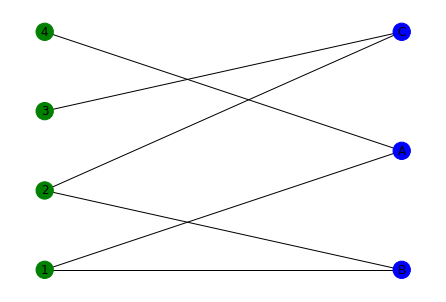

In [99]:
B = nx.Graph()
B.add_nodes_from([1,2,3,4], bipartite=0) # Add the node attribute "bipartite"
B.add_nodes_from(['A','B','C'], bipartite=1)
B.add_edges_from([(1,'A'), (1,'B'), (2,'B'), (2,'C'), (3,'C'), (4,'A')])

top = nx.bipartite.sets(B)[0]
pos = nx.bipartite_layout(B, top)
nx.draw(B, pos=pos, with_labels=True, node_color=['green','green','green','green','blue','blue','blue'])
plt.show()


### Complete Graph
The complete graph on n vertices, also known as the K-network is a graph where every vertex is connected to every other vertex.
The following example creates a complete directed graph. The graph has 15 nodes, and each node is connected to every other node. The `DiGraph` class is used to create a directed graph, and the `complete_graph` function is used to create a complete graph with 15 nodes. Finally, the graph is drawn.



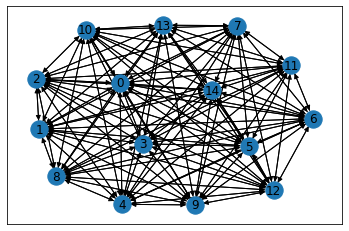

In [100]:
CG = nx.complete_graph(15, nx.DiGraph())
nx.draw_networkx(CG)
plt.show()

## Graph Concepts
###  Degree of Nodes

The degree of nodes in a graph refers to the number of edges connected to each node. It is a measure applicable to both directed and undirected graphs.

The degree of a node in an undirected graph is the number of edges incident on it.

Here is an example on computing the Degree of each node of the graph `UG` previously created:

In [101]:
for node in nx.nodes(UG):
    print(f"deg({node}) = {UG.degree[node]}")

deg(A) = 2
deg(B) = 3
deg(C) = 3
deg(D) = 1
deg(E) = 1
deg(F) = 1
deg(G) = 1



 for directed graphs the indegree of a node is the number of edges leading into that node and its outdegree, the number of edges leading away from it .

 Here is an example on computing the Degree, indegree, and outdegree of each node of the graph `DG` previously created:

In [102]:
for node in nx.nodes(DG):
    print(f"deg({node}) = {DG.degree[node]}")
    print(f"deg^-({node}) = {DG.in_degree[node]}")
    print(f"deg^+({node}) = {DG.out_degree[node]}")
    print("______________________________")


deg(A) = 2
deg^-(A) = 0
deg^+(A) = 2
______________________________
deg(B) = 3
deg^-(B) = 1
deg^+(B) = 2
______________________________
deg(C) = 3
deg^-(C) = 1
deg^+(C) = 2
______________________________
deg(D) = 1
deg^-(D) = 1
deg^+(D) = 0
______________________________
deg(E) = 1
deg^-(E) = 1
deg^+(E) = 0
______________________________
deg(F) = 1
deg^-(F) = 1
deg^+(F) = 0
______________________________
deg(G) = 1
deg^-(G) = 1
deg^+(G) = 0
______________________________


###  Node Neighbors, Node Adjanceny, and  Paths
- Neighboring nodes are those that are directly connected by an edge. 
We can get node `C` neigbors for example in the graph `UG` as follows:

In [103]:
# Get neighbor of node ‘C’ in the unDirected Graph UG
for neighbor in UG.neighbors("C"):
  print("Node {} has neighbor {}".format("C", neighbor))

Node C has neighbor A
Node C has neighbor F
Node C has neighbor G


- Two nodes are adjacent if they share the same edge. We can get Node  `C` adjacent nodes in the graph `UG` as follows:

In [104]:
# Node for which you want to get the adjacency
source_node = 'C'
# Get the adjacency of the specified node
adjacency_of_node_c = list(UG.adj[source_node])
# Print the adjacency of node "C"
print(f"Adjacency of node {source_node}: {adjacency_of_node_c}")


Adjacency of node C: ['A', 'F', 'G']


- A path is a sequence of vertices or nodes connected by edges. 
- The path length in a graph refers to the number of edges that separate two vertices in the graph.

Here is an example on how to get the path length from source node `C` to target node `G`

In [105]:
target_node = 'G'
# Get the path length from node "C" to node "G"
path_length = nx.shortest_path_length(UG,
				                      source=source_node,
                                      target= target_node)
# Print the path length
print(f"Path length from node {source_node} to node {target_node}: {path_length}")

Path length from node C to node G: 1


### Graph Centrality Measures
 used to evaluate the relative importance of a node within a graph. The most common centrality measures include degree centrality, closeness centrality, and betweenness centrality.
#### Degree centrality:
Degree centrality is a measure of the importance of a node (i.e., person, group, or organization) within a network based on the number of connections it has to other nodes. In other words, it represents the number of direct connections a node has to other nodes in the network. A node with high degree centrality is likely to be a key player or hub within the network.  

Here is an example on how to compute it within the undirected graph `UG`:

In [106]:
print(nx.degree_centrality(UG))                    

{'A': 0.3333333333333333, 'B': 0.5, 'C': 0.5, 'D': 0.16666666666666666, 'E': 0.16666666666666666, 'F': 0.16666666666666666, 'G': 0.16666666666666666}


Here is an example on how to compute it within the directed graph `DG`:

In [107]:
print(nx.degree_centrality(DG))                    #deg(v_i)
print(nx.in_degree_centrality(DG))                 #deg^(-)(v_i)
print(nx.out_degree_centrality(DG))                #deg^(+)(v_i)


{'A': 0.3333333333333333, 'B': 0.5, 'C': 0.5, 'D': 0.16666666666666666, 'E': 0.16666666666666666, 'F': 0.16666666666666666, 'G': 0.16666666666666666}
{'A': 0.0, 'B': 0.16666666666666666, 'C': 0.16666666666666666, 'D': 0.16666666666666666, 'E': 0.16666666666666666, 'F': 0.16666666666666666, 'G': 0.16666666666666666}
{'A': 0.3333333333333333, 'B': 0.3333333333333333, 'C': 0.3333333333333333, 'D': 0.0, 'E': 0.0, 'F': 0.0, 'G': 0.0}


#### Closness Centrality:
 Closeness Centrality is a network centrality measure that assesses the degree to which a node is close to all other nodes in the network. It is calculated by averaging the shortest distances between a node and all other nodes in the network. 

 Here is an example on how to compute it within the undirected graph `UG`:

In [108]:
print(nx.closeness_centrality(UG))

{'A': 0.6, 'B': 0.5454545454545454, 'C': 0.5454545454545454, 'D': 0.375, 'E': 0.375, 'F': 0.375, 'G': 0.375}


Here is an example on how to compute it within the directed graph `DG`:

In [109]:
print(nx.closeness_centrality(DG))

{'A': 0.0, 'B': 0.16666666666666666, 'C': 0.16666666666666666, 'D': 0.2222222222222222, 'E': 0.2222222222222222, 'F': 0.2222222222222222, 'G': 0.2222222222222222}


#### Betweenness centrality:
 Betweenness centrality is a measure of the extent to which a node lies on the shortest paths between other nodes in a network. It represents the extent to which a node acts as a bridge or hub between other nodes.

  Here is an example on how to compute it within the undirected graph `UG`:

In [110]:
print(nx.betweenness_centrality(UG))

{'A': 0.6, 'B': 0.6, 'C': 0.6, 'D': 0.0, 'E': 0.0, 'F': 0.0, 'G': 0.0}


Here is an example on how to compute it within the directed graph `DG`:

In [111]:
print(nx.betweenness_centrality(DG))

{'A': 0.0, 'B': 0.06666666666666667, 'C': 0.06666666666666667, 'D': 0.0, 'E': 0.0, 'F': 0.0, 'G': 0.0}


### Graph Representation
Common ways to represent a graph are:
#### Adjacency Edges
Adjacency edges to create a graph" is a common query used in graph theory to refer to the edges that connect adjacent nodes in a graph. By adding these edges, you can create a graph that represents relationships between objects or entities in a particular domain. 

Here is an example on how to create a graph using adjacency edges:

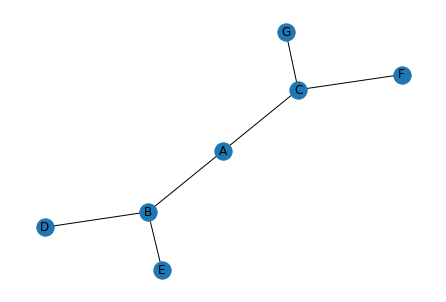

In [112]:
# Given edge list
edge_list = [('A', 'B'), ('A', 'C'),
             ('B', 'A'), ('B', 'D'), ('B', 'E'),
             ('C', 'A'), ('C', 'F'), ('C', 'G'),
             ('D', 'B'),
             ('E', 'B'),
             ('F', 'C'),
             ('G', 'C')]

# Create a graph from the edge list
G = nx.Graph(edge_list)

# Draw the graph
nx.draw(G, with_labels=True)


#### Adjacency Matrix
 Adjacency matrices are a common technique used to represent graphs in computer science and mathematics. In an adjacency matrix, each vertex is represented by a binary value (0 or 1) that indicates whether it is connected to a particular vertex or not. This can be used to create a graph from a set of unordered pairs of vertices, where a 1 in the matrix indicates that the vertices are connected and a 0 indicates that they are not.  

Here is an example on how to create a graph using Adjacency Matrix:

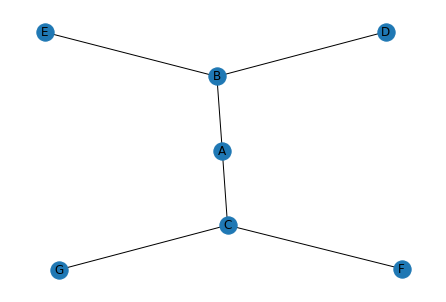

In [113]:
import numpy as np

# Given adjacency matrix
adj_matrix = np.array([[0,1,1,0,0,0,0],
                [1,0,0,1,1,0,0],
                [1,0,0,0,0,1,1],
                [0,1,0,0,0,0,0],
                [0,1,0,0,0,0,0],
                [0,0,1,0,0,0,0],
                [0,0,1,0,0,0,0]])
# Desired node labels
node_labels = {0:'A', 1:'B', 2:'C', 3:'D', 4:'E', 5:'F',
               6:'G'}
# Create a graph from the adjacency matrix
G = nx.from_numpy_matrix(adj_matrix)
# Relabel nodes
G = nx.relabel_nodes(G, node_labels)
# Draw the graph with specified labels
nx.draw(G, with_labels=True)


#### Adjacency Nodes
 Adjacency nodes are used to create a graph in data structure and algorithms by connecting nodes that are adjacent to each other in a graph. In a graph, each node represents an entity, and the edges between nodes represent the relationships between these entities. Adjacency nodes are an important concept in graph theory, as they allow for efficient traversal and processing of graphs.   

Here is an example on how to create a graph using Adjacency Nodes:

Nodes: ['A', 'B', 'C', 'D', 'E', 'F', 'G']
Edges: [('A', 'B'), ('A', 'C'), ('B', 'D'), ('B', 'E'), ('C', 'F'), ('C', 'G')]


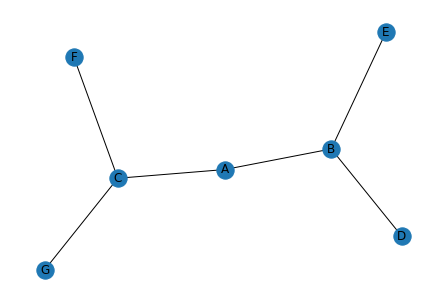

In [114]:
# Given adjacency list with node labels as alphabets
adj_nodes = {
    'A': ['B', 'C'],
    'B': ['A', 'D', 'E'],
    'C': ['A', 'F', 'G'],
    'D': ['B'],
    'E': ['B'],
    'F': ['C'],
    'G': ['C']
}

# Create a graph from the adjacency nodes
G = nx.Graph(adj_nodes)

# Print the nodes and edges
print("Nodes:", G.nodes())
print("Edges:", G.edges())
nx.draw(G, with_labels= True)


We may also create a graph from a text containing the adjacency nodes saved as a  list format that represents edges pairings in the first two columns. Additional edge atributes can be added in subsequent columns. Looking at `G_edgeNodes.txt`

For example, from the first row, we can see the edge between  source nodes  and destination nodes, has a weight of 4.

In [115]:
import pandas as pd
G_df = pd.read_csv('data/G_edgeNodes.txt', delim_whitespace = True, 
                   header = None, names = ['source','destination', 'weight'])
G_df

,source,destination,weight
0,0,1,4
1,0,2,3
2,0,3,2
3,0,5,6
4,1,3,2
5,1,6,5
6,3,4,3
7,4,5,1
8,4,7,2
9,5,8,6


We can now create the graph from this data frame as follows:

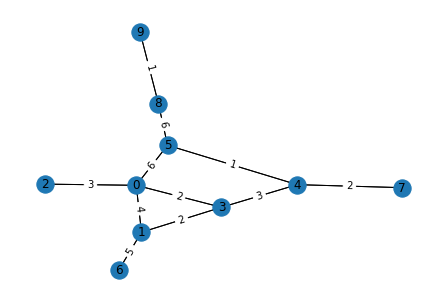

In [116]:
G3 = nx.from_pandas_edgelist(G_df, 'source','destination', edge_attr='weight')

# Drawing the graph
pos = nx.spring_layout(G3)
nx.draw(G3, pos, with_labels= True)
nx.draw_networkx_edges(G3, pos)
nx.draw_networkx_edge_labels(G3, pos, edge_labels=nx.get_edge_attributes(G3, 'weight'))
plt.show()

## Graph Traversal Algorithms
Graph Traversal Algorithms such as BFS abd DFS are already implemented in `NetworkX`

Here are examples on how to use them for the Undirected Graph `UG`.

BFS Result: [('A', 'B'), ('A', 'C'), ('B', 'D'), ('B', 'E'), ('C', 'F'), ('C', 'G')]


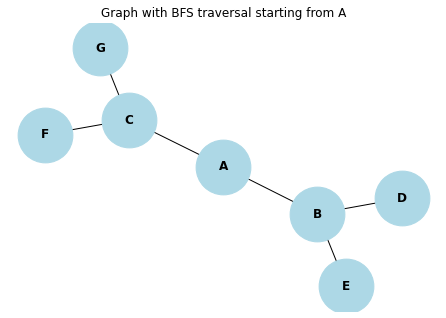

In [117]:
# Perform BFS starting from node 'A'
bfs_result = list(nx.bfs_edges(UG, source='A'))

# Print the BFS result
print("BFS Result:", bfs_result)

# Draw the graph
nx.draw(UG, with_labels=True, node_color='lightblue', node_size=3000, font_size=12, font_weight='bold')
plt.title('Graph with BFS traversal starting from A')
plt.show()


DFS Result: [('A', 'B'), ('B', 'D'), ('B', 'E'), ('A', 'C'), ('C', 'F'), ('C', 'G')]


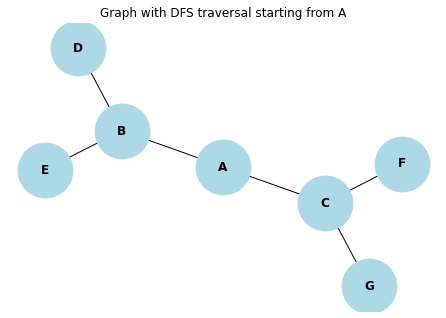

In [118]:
# Perform DFS starting from node 'A'
dfs_result = list(nx.dfs_edges(UG, source='A'))

# Print the DFS result
print("DFS Result:", dfs_result)

# Draw the graph
nx.draw(UG, with_labels=True, node_color='lightblue', node_size=3000, font_size=12, font_weight='bold')
plt.title('Graph with DFS traversal starting from A')
plt.show()


# Challenges:

## Challenge 1: 
Using the Graph `G3`:
- Calculate the centrality measures.
- Apply the BFS and DFS algorithms from a source node to a target node that you choose. 

In [119]:
#your solution

## Challenge 2: 
Using the  matrix of a network graph saved in the file `data/inf-USAir97.mtx`:
- Create the graph using the follwing code:
```
from scipy.io import mmread
adj_mat = mmread("data/inf-USAir97.mtx")
graph = nx.from_scipy_sparse_matrix(adj_mat)
```

- Draw the graph
- Calculate the centrality measures.
- Apply the BFS and DFS algorithms from a source node to a target node that you choose.


In [120]:
#your solution